In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('US_honey_dataset.csv')

In [3]:
df.head()

,Unnamed: 0,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
0,0,Alabama,16000,58,928000,28000,62.0,575000,1995
1,1,Arizona,52000,79,4108000,986000,68.0,2793000,1995
2,2,Arkansas,50000,60,3000000,900000,64.0,1920000,1995
3,3,California,420000,93,39060000,4687000,60.0,23436000,1995
4,4,Colorado,45000,60,2700000,1404000,68.0,1836000,1995


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           1115 non-null   int64  
 1   state                1115 non-null   object 
 2   colonies_number      1115 non-null   int64  
 3   yield_per_colony     1115 non-null   int64  
 4   production           1115 non-null   int64  
 5   stocks               1115 non-null   int64  
 6   average_price        1115 non-null   float64
 7   value_of_production  1115 non-null   int64  
 8   year                 1115 non-null   int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 78.5+ KB


In [5]:
df.isnull().sum()

Unnamed: 0             0
state                  0
colonies_number        0
yield_per_colony       0
production             0
stocks                 0
average_price          0
value_of_production    0
year                   0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
#df.drop_duplicates()

## 1) Which states are rarely contributing to honey production for the last 27 years?

In [8]:
contri = df.groupby('state')['production'].sum().reset_index()
contri.head()

,state,production
0,Alabama,14467000
1,Arizona,38844000
2,Arkansas,51846000
3,California,423876000
4,Colorado,32660000


In [9]:
rarely_contri = contri.sort_values(by ='production', ascending=True)
rarely_contri.head()

,state,production
16,Maryland,1975000
30,Oklahoma,2055000
33,SouthCarolina,2823000
13,Kentucky,3224000
15,Maine,4762000


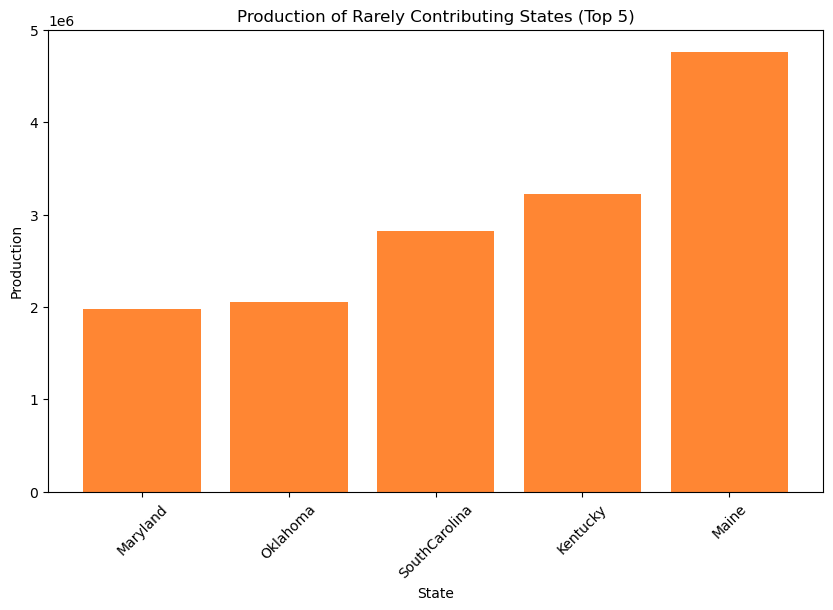

In [26]:
# Assuming rarely_contri has 'production' and a categorical column like 'state'
top_5_states = rarely_contri.head(5)

plt.figure(figsize=(10, 6))
plt.bar(top_5_states['state'], top_5_states['production'], color='#ff8633')

plt.xlabel('State')
plt.ylabel('Production')
plt.title('Production of Rarely Contributing States (Top 5)')
plt.xticks(rotation=45)  # Rotate labels for better visibility

plt.show()

## 2. Which are the top 5 Honey producing states in the US ?

In [11]:
top_counti = contri.sort_values(by='production', ascending=False)
top_counti.head()

,state,production
28,NorthDakota,513742000
3,California,423876000
34,SouthDakota,355726000
5,Florida,280934000
21,Montana,197173000


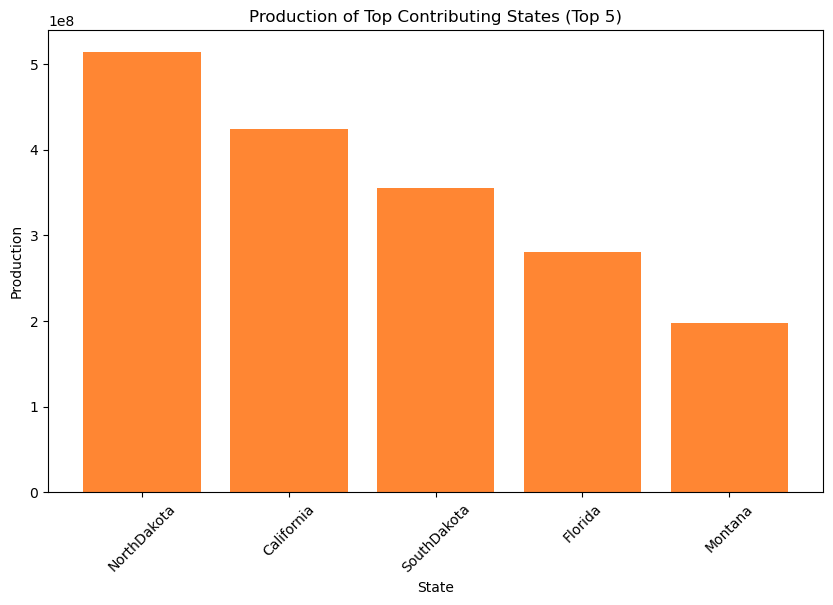

In [25]:
top_5_states = top_counti.head(5)

plt.figure(figsize=(10, 6))
plt.bar(top_5_states['state'], top_5_states['production'], color='#ff8633')

plt.xlabel('State')
plt.ylabel('Production')
plt.title('Production of Top Contributing States (Top 5)')
plt.xticks(rotation=45)  # Rotate labels for better visibility

plt.show()

## Q.3 What is the Change in mean Average price of Honey from 1995 to 2021?

In [30]:
year_avg = df.groupby('year')['average_price'].mean()
year_avg

year
1995     74.840909
1996     99.568182
1997     91.325581
1998     83.720930
1999     80.325581
2000     79.023256
2001     88.465116
2002    133.204545
2003    151.068182
2004    132.350000
2005    116.341463
2006    134.341463
2007    140.170732
2008    160.878049
2009    176.195122
2010    192.900000
2011    216.725000
2012    236.700000
2013    260.717949
2014    282.025000
2015    292.625000
2016    291.925000
2017    302.775000
2018      3.083500
2019      2.925500
2020      3.050000
2021      3.334250
Name: average_price, dtype: float64

In [31]:
change_mean = year_avg.loc[1995]-year_avg.loc[2021]
change_mean

71.5066590909091

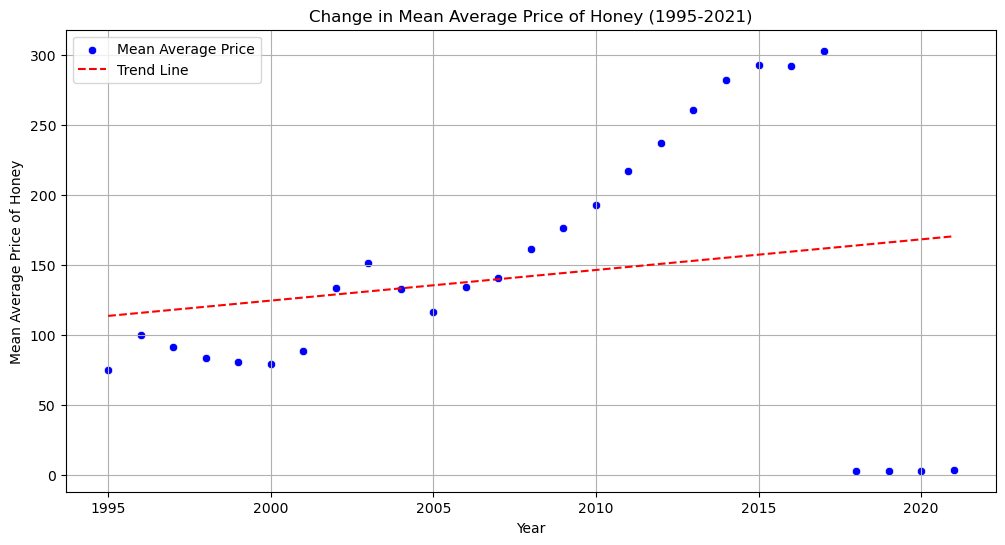

In [32]:
# Prepare data
years = year_avg.index.values
prices = year_avg.values

# Create scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x=years, y=prices, color='blue', label='Mean Average Price')

# Fit and plot a trend line
z = np.polyfit(years, prices, 1)  # Linear fit
p = np.poly1d(z)
plt.plot(years, p(years), color='red', linestyle='--', label='Trend Line')

# Labels and title
plt.xlabel('Year')
plt.ylabel('Mean Average Price of Honey')
plt.title('Change in Mean Average Price of Honey (1995-2021)')
plt.legend()
plt.grid()

# Save the figure
plt.savefig('honey_price_trend.png', dpi=300, bbox_inches='tight')
plt.show()

## Q.4 Which was the year when production of Honey in wholeUS was the highest?

In [49]:
Highest_year = df.groupby('year')['production'].sum().reset_index()
Highest_year.head()

,year,production
0,1995,210272000
1,1996,197995000
2,1997,191176000
3,1998,219321000
4,1999,204585000


In [50]:
top_year = Highest_year.sort_values('production',ascending=False)
top_year.head()

,year,production
5,2000,220320000
3,1998,219321000
0,1995,210272000
4,1999,204585000
1,1996,197995000


## Q.5 From the above inference we get the production was highest in the year 2000, now let infer which state was having highest contribution in that year

In [52]:
state_year = df.groupby(['state','year'])['production'].sum().reset_index()
state_year.head()

,state,year,production
0,Alabama,1995,928000
1,Alabama,1996,1024000
2,Alabama,1997,924000
3,Alabama,1998,1136000
4,Alabama,1999,1156000


In [53]:
state_2000 = state_year.loc[(state_year['year']==2000)]
state_2000.head()

,state,year,production
5,Alabama,2000,1248000
32,Arizona,2000,2360000
59,Arkansas,2000,5115000
86,California,2000,30800000
113,Colorado,2000,1740000


In [60]:
top5_state= state_2000.sort_values(by='production',ascending=False)
top5_state.head()


,state,year,production
721,NorthDakota,2000,33350000
86,California,2000,30800000
850,SouthDakota,2000,28435000
140,Florida,2000,24360000
472,Minnesota,2000,13500000


## Q.6 Which states have the highest no. of colonies in the year 2000?

In [66]:
col_state = df.groupby(['state','year'])['colonies_number'].sum().reset_index()
col_state.head()

,state,year,colonies_number
0,Alabama,1995,16000
1,Alabama,1996,16000
2,Alabama,1997,14000
3,Alabama,1998,16000
4,Alabama,1999,17000


In [70]:
state_2000 = col_state.loc[(col_state['year']==2000)]
state_2000.head()

,state,year,colonies_number
5,Alabama,2000,16000
32,Arizona,2000,40000
59,Arkansas,2000,55000
86,California,2000,440000
113,Colorado,2000,29000


In [71]:
high_state_2000 = state_2000.sort_values(by='colonies_number', ascending=False)
high_state_2000.head(1)

,state,year,colonies_number
86,California,2000,440000
